In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
dept_dummies = pd.get_dummies(df.Department)
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [6]:
salary_dummies = pd.get_dummies(df.salary)
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [25]:
df.drop(['Department','salary'],axis='columns',inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [32]:
dummies = pd.concat([salary_dummies,dept_dummies],axis='columns')
list(dummies)

['high',
 'low',
 'medium',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [27]:
mdf = pd.concat([df,dummies],axis='columns')
mdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
factors = ['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
factors.extend(list(dummies))
X = mdf[factors]
X

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,2,160,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,2,143,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,6,280,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [38]:
y  = mdf.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model  = LogisticRegression()
model.fit(X,y)

c:\Users\sr sawant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.score(X,y)

0.7891192746183079

# Multiclass

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

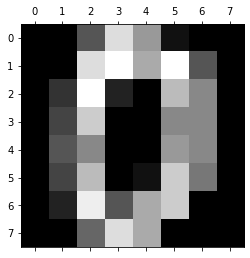

In [4]:
plt.gray()
plt.matshow(digits.images[0])

In [5]:
digits.target #same as index

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
from sklearn.model_selection import train_test_split

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=10)

In [8]:
len(X_test),len(X_train),len(Y_test),len(Y_train)

(360, 1437, 360, 1437)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
model = LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\sr sawant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.predict(digits.data[:5])

array([0, 1, 2, 3, 4])

In [6]:
model.score(X_test,Y_test)

0.95

In [17]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'truth')

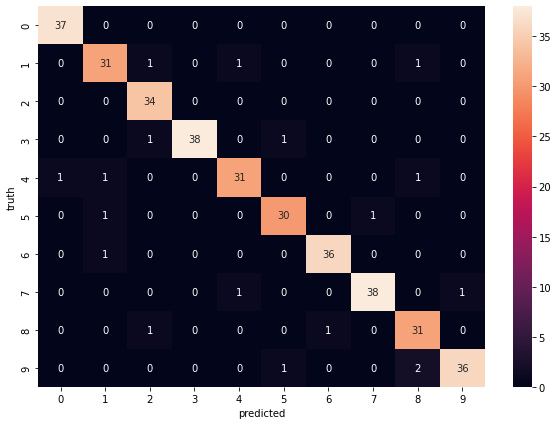

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# Excercise

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [24]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(flowers.data,flowers.target,test_size=0.2,random_state=10)

In [28]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
flowers.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [35]:
flowers.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
model.score(X_test,Y_test)

1.0

In [31]:
flowers.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
[flowers.target_names[i] for i in model.predict(X_test)]

['versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica']

In [40]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [41]:
import seaborn as sb

Text(69.0, 0.5, 'truth')

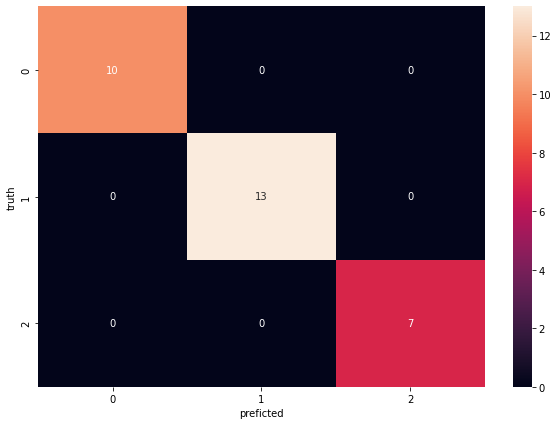

In [42]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('preficted')
plt.ylabel('truth')